#  Manually-constructed neural network for regression

In the notebook of tutorial 1 (Notebook 1), we explored simple linear regression based on Portugese white wine data set. Here, we continue with the analysis of the same data set. However, we now manually implement a simple network for solving the regression problem.

## Getting the data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the path to the data
csv_path = r"/Users/murilo/Downloads/Tutorials-20231205/Tutorial 1/winequality-white.csv"
data = pd.read_csv(csv_path, delimiter=";")

In [2]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Split the data into train and test sets

data_np = data.values # transform to numpy array

np.random.shuffle(data_np) # randomly shuffle data

# use first 3000 examples for training
X_train = data_np[:3000,:11] # predictors
y_train = data_np[:3000,11]  # target variable

# and remaining examples for testing
X_test = data_np[3000:,:11] # predictors
y_test = data_np[3000:,11] # target variable

The main objective here is to train a neural network with one input layer, one hidden layer, and one output layer using gradient descent. First define the matrices and initialise with random values. We need W, b, W' and b'. The shapes will be:

- W: (number of hidden nodes, number of inputs) named **W**
- b: (number of hidden nodes) named **b**
- W': (number of hidden nodes) named **Wp**
- b': (one) named bp

In [4]:
# Initialise weights with suitable random distributions

hidden_nodes = 50 # number of nodes in the hidden layer
n_inputs = 11 # input features in the dataset

W = np.random.randn(hidden_nodes,11)*np.sqrt(2./n_inputs)
b = np.random.randn(hidden_nodes)*np.sqrt(2./n_inputs)
Wp = np.random.randn(hidden_nodes)*np.sqrt(2./hidden_nodes)
bp = np.random.randn((1))

print(W.shape)
print(b.shape)

(50, 11)
(50,)


## Tasks

1. Implement a forward pass of the network within the function **dnn()**. We want a network with one hidden layer. As activiation in the hidden layer $\sigma$ we apply element-wise ReLu, while no activation is used for the output layer. The forward pass of the network then reads: 
$\hat{y}=\mathbf{W}^{\prime} \sigma(\mathbf{W} \vec{x}+\vec{b})+b^{\prime}$

In [5]:
# You can use this implementation of the ReLu activation function
def relu(x):
    return np.maximum(x, 0)

In [6]:
def dnn(x, W, b, Wp, bp):
    a = relu(np.dot(W, x) + b)
    r = np.dot(Wp, a) + bp
    return r

2. Implement a function that uses one data point to update the weights using gradient descent. For the regression problem the objective function is the mean squared error between the prediction and the true label $y$: $ L=(\hat{y}-y)^{2}$. Taking the partial derivatives - and diligently the applying chain rule - with respect to the different objects yields:
$$
\begin{aligned}
\frac{\partial L}{\partial b^{\prime}} &=2(\hat{y}-y) \\
\frac{\partial L}{\partial b_{k}} &=2(\hat{y}-y) \mathbf{W}_{k}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k}^{\prime}} &=2(\hat{y}-y) \sigma\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k m}} &=2(\hat{y}-y) \mathbf{W}_{m}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{m}\right) x_{k}
\end{aligned}
$$
Here, $\Theta$ denotes the Heaviside step function. Your task is to follow and complete the **update_weights()** function below

In [7]:
def update_weights(x,y, W, b, Wp, bp):
    
    lr = 0.00005

    # TODO: Calculate the network output (use the function dnn defined above)

    phi = dnn(x, W, b, Wp, bp)
  
    # TODO: Using the gradient for each of W,b,Wp,bp by taking the partial
    # derivative of the loss function with respect to the variable (as shown above),
    # implement the resulting weight-update procedure

    delta_bp = 2 * (phi - y)
    delta_b = 2 * (phi - y) * Wp * np.heaviside(np.dot(W, x) + b, 0.5)
    delta_Wp = 2 * (phi - y) * relu(np.dot(W, x) + b)
    delta_W = 2 * (phi - y) * np.outer(Wp * np.heaviside(np.dot(W, x) + b, 0.5), x)

    # You might need these numpy functions:
    # np.dot, np.outer, np.heaviside
    # Hint: Use .shape and print statements to make sure all operations
    # do what you want them to 
    
    # TODO: Update the weights/bias following the rule:  weight_new = weight_old - learning_rate * gradient

    bp -= lr * delta_bp
    b -= lr * delta_b
    Wp -= lr * delta_Wp
    W -= lr * delta_W

    return -1 # no return value needed, you can modify the weights in-place

## Training loop and evaluation below

Epoch: 0 Train Loss: 1.8299658423525824 Test Loss: 1.912122388240324
Epoch: 1 Train Loss: 1.1306684867240373 Test Loss: 1.195552521473732
Epoch: 2 Train Loss: 0.9732887996256953 Test Loss: 1.0297201808950116
Epoch: 3 Train Loss: 0.9052367242372432 Test Loss: 0.9578209424932754
Epoch: 4 Train Loss: 0.8645998557852548 Test Loss: 0.9126365882885948
Epoch: 5 Train Loss: 0.8369339472910482 Test Loss: 0.8813231728204932
Epoch: 6 Train Loss: 0.8174841667376477 Test Loss: 0.8613700620057559
Epoch: 7 Train Loss: 0.8017910517180138 Test Loss: 0.8458554071239966
Epoch: 8 Train Loss: 0.789402723830377 Test Loss: 0.8329963490196965
Epoch: 9 Train Loss: 0.7791797116380776 Test Loss: 0.822273307556445
Epoch: 10 Train Loss: 0.7717812646241109 Test Loss: 0.8154541940018107
Epoch: 11 Train Loss: 0.7628526750709996 Test Loss: 0.804938335933721
Epoch: 12 Train Loss: 0.7573851095163697 Test Loss: 0.8006118387240865
Epoch: 13 Train Loss: 0.7514546165862033 Test Loss: 0.7947059212425351
Epoch: 14 Train Loss:

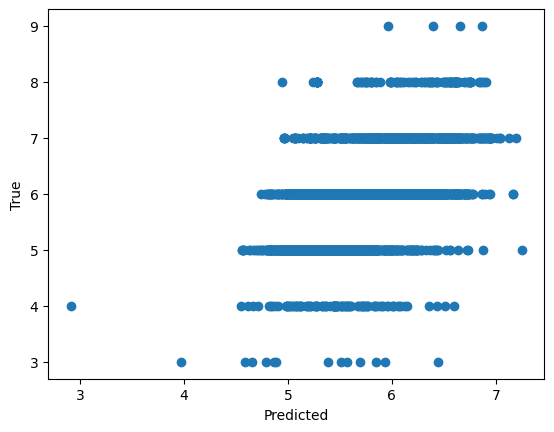

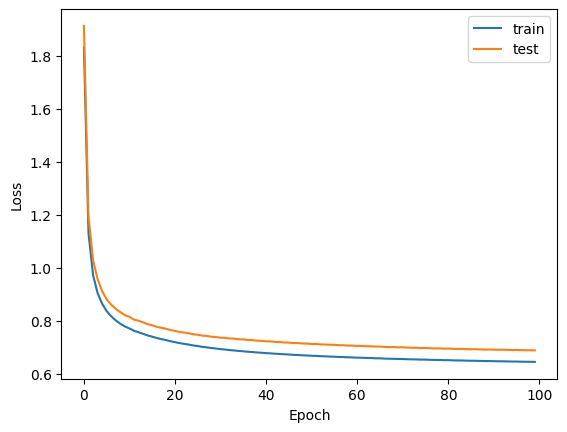

In [8]:
# The code below implements the training.
# If you correctly implement  dnn and update_weights above, 
# you should not need to change anything below. 
# (apart from increasing the number of epochs)

train_losses = []
test_losses = []

# How many epochs to train
# This will just train for one epoch
# You will want a higher number once everything works
n_epochs = 100

# Loop over the epochs
for ep in range(n_epochs):
        
    # Each epoch is a complete over the training data
    for i in range(X_train.shape[0]):
        
        # pick one example
        x = X_train[i]
        y = y_train[i]

        # use it to update the weights
        update_weights(x,y,W,b,Wp,bp)
    
    # Calculate predictions for the full training and testing sample
    y_pred_train = [dnn(x,W,b,Wp,bp)[0] for x in X_train]
    y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

    # Calculate aver loss / example over the epoch
    train_loss = sum((y_pred_train-y_train)**2) / y_train.shape[0]
    test_loss = sum((y_pred-y_test)**2) / y_test.shape[0] 
    
    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss, "Test Loss:", test_loss)
    
    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    
# After the training:
    
# Prepare scatter plot
y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

print("Best loss:", min(test_losses), "Final loss:", test_losses[-1])

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred_train,y_train)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prepare and loss over time
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()